# Лабораторная работа №5
## ПРИМЕНЕНИЕ СИНГУЛЯРНОГО СПЕКТРАЛЬНОГО АНАЛИЗА ДЛЯ ДЕКОМПОЗИЦИИ ВРЕМЕННОГО РЯДА
### Комлева Юлия Владимировна
### Вариант: 9
### Группа: РИМ-181226
Singular Spectrum Analysis

In [608]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

Метод сингулярного спектрального анализа SSA:
1. Этап разложения
    - Шаг вложения
    - Шаг сингулярного разложения
    
2. Этап восстановления
    - Шаг группировки
    - Шаг усреднения

### Этап разложения
#### Шаг вложения
$F=f(t)=\left\{ f(t_0),...,f(t_{N-1})\right\}$ - исследуемый временной ряд с числом отсчетов $N$, $t_i=i\Delta t,$, где $\Delta t$ - период выборки.

Процедура вложения переводит исходный временной ряд в последовательность многомерных векторов. Процедура вложения образует $K=N-L+1$ векторов вложения, имеющих размерность $L$.
$$X_i=(f_{i-1},...,f_{i+L-2})^T,~1 \leq i\leq K$$
$X$ - траекторная матрица ряда $F$ и состоит из векторов вложения  в качестве столбцов $X=[X_1:...:X_K]$
$$X=\left( x_{ij}\right) ^{L,K}_{i,j=1}=\left( \begin{matrix}f_0&&f_1&&f_2&&\cdots &&f_{K-1} \\ f_1&&f_2&&f_3&&\cdots &&f_K \\ f_2&&f_3&&f_4&&\cdots &&f_{K+1} \\ \vdots &&\vdots &&\vdots && \ddots &&\vdots \\ f_{L-1}&&f_L&&f_{L+1}&&\cdots &&f_{N-1}\end{matrix}\right)$$
Очевидно, что $x_{ij}=f_{i+j-2}$ и поэтому матрица $X$ имеет одинаковые элементы на «диагоналях» $i+j=const$. Таким образом, траекторная матрица является ганкелевой. Существует взаимно-однозначное соответствие между ганкелевыми матрицами размерности $L\times K$ и рядами длины $N=L+K-1$
#### Шаг сингулярного разложения
Singular Value Decomposition = SVD траекторной матрицы ряда. 

Пусть $S=XX^T$. $\lambda _1,...,\lambda _L$ - собственные числа матрицы $S$, взятые в неубывающем порядке $(\lambda  _1 \geq \lambda  _2 \geq ... \geq \lambda _L \geq 0)$ и $U_1,...,U_L$ – ортонормированную систему собственных векторов матрицы $S$, соответствующих собственным числам.

Пусть $d=\max \{ i:\lambda _i > 0\}$. Обозначим $V_i=X^TU_i / \sqrt{\lambda _1}$, $~i=1,...,d,$. Тогда сингулярное разложение матрицы $X$: $X=X_1+...+X_d$, где $X_i=\sqrt{\lambda _i}U_iV^T_i$. 

Каждая из этих матриц $X_i$ имеет ранг 1. Поэтому их можно назвать элементарными матрицами. 

Набор $\left( \sqrt{\lambda _i},U_i,V_i\right)$ называют $i$-й __собственной тройкой__ сингулярного разложения.

In [609]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    #шаг вложения
    for i in range(0, L): #rows
        for j in range(0, K):
            X[i,j] = F[i+j]
    #X = np.column_stack([F[i:i+L] for i in range(0,K)])
    #шаг сингулярного разложени]
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    # U - матрица собственных векторов
    # A - массив собственных чисел (в неубывающем порядке)
    V = np.dot(X.T, U) #матрица траекторных векторов
    return A, U, V

##### Проверка

In [610]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3
#print(A) # собственные числа
#print(U) # собственные вектора
#print(V) # траекторные вектора

check_A = np.array([129.66842566, 12., 3.33157434])
check_U = np.array( [[-5.78869570e-01, 7.07106781e-01, 4.06091149e-01],
    [-5.74299610e-01, 4.14039445e-16, -8.18645196e-01],
    [-5.78869570e-01, -7.07106781e-01, 4.06091149e-01]])
check_V = np.array([[-3.46407750e+00, 1.41421356e+00, -1.29257973e-02],
    [-2.88977789e+00, 0.00000000e+00, 8.05719399e-01],
    [-3.46407750e+00, -1.41421356e+00, -1.29257973e-02],
    [-4.03837711e+00, 8.88178420e-16, -8.31570994e-01],
    [-3.46407750e+00, 1.41421356e+00, -1.29257973e-02],
    [-2.88977789e+00, 0.00000000e+00, 8.05719399e-01],
    [-3.46407750e+00, -1.41421356e+00, -1.29257973e-02],
    [-4.03837711e+00, 8.88178420e-16, -8.31570994e-01],
    [-3.46407750e+00, 1.41421356e+00, -1.29257973e-02],
    [-2.88977789e+00, 0.00000000e+00, 8.05719399e-01],
    [-3.46407750e+00, -1.41421356e+00, -1.29257973e-02]])

np.allclose(A, check_A) and np.allclose(U, check_U) and np.allclose(V, check_V)

True

### Этап восстановления
#### Шаг группировки
На основе разложения $X=X_1+...+X_d$, где $X_i=\sqrt{\lambda _i}U_iV^T_i$ процедура группировки, по сути, делит все множество индексов $\{1,...,d\}$ на $m$ непересекающихся подмножеств $I_1,...,I_m$.

Пусть $I=\{i_1,...i_p\}$. Тогда результирующая матрица $X_I$  соответствующая группе $I$ определяется как $X_I=X_{i_1}+...+X_{i_p}$. Такие матрицы вычисляются для $I=I_1,...,I_m$, тем самым разложение  может быть записано в сгруппированном виде: $X=X_{I_1}+...+X_{I_m}$

Процедура выбора множеств $I=I_1,...,I_m$ и называется группировкой собственных троек. 
#### Шаг диагонального усреднения
Каждая матрица сгруппированного разложения переводится в новый ряд длины $N$.

Пусть $Y$ – некоторая $L\times K$ матрица с элементами $y_{ij}$, где $1 \leq i \leq  L$, $1\leq j \leq K$.  Положим $L^*=\min(L,K)$, $K^*=\max(L,K)$  и $N=L+K-1$. Пусть $y^*_{ij}=y_{ij},$ если $L\leq K$ и $y^*_{ij}=y_{ij}$ – иначе. __Диагональное усреднение__ переводит матрицу  во временной ряд  по формуле:

$$g_k=\left\{ \begin{matrix} \frac {1}{k+1}\sum \limits^{k+1}_{m=1}y^*_{m,k-m+2} && 0\leq k < L^*-1, \\ \frac {1}{L^*}\sum \limits^{L^*}_{m=1}y^*_{m,k-m+2}&&L^*-1\leq k < K^*, \\ \frac {1}{N-k}\sum \limits^{N-K^*+1}_{m=k-K+2}y^*_{m,k-m+2}&&K^*\leq k<N.\end{matrix} \right. $$

### бла-бла-бла

In [611]:
def SSA_group(A, U, V, N, I):
    
    L = len(A)
    K = N - L + 1

    #шаг группировки
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])

    #этап диагонального усреднения
    G = np.zeros(N)
    L_ = min(L, K)
    K_ = max(L, K)    
    
    for k in range(0, L_):
        for m in range(0, k + 1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(k+1)
    for k in range(L_, K_):
        for m in range(0, L_):    
            G[k] += Z[m][k-m]   
        G[k] *= 1/L_
    for k in range(K_, N):
        for m in range(k-K_+1, N-K_+1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(N-k)
    return G

In [612]:
ts

array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3])

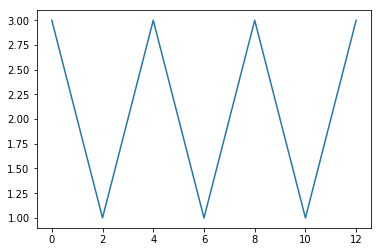

In [613]:
plt.plot(ts)
plt.show()

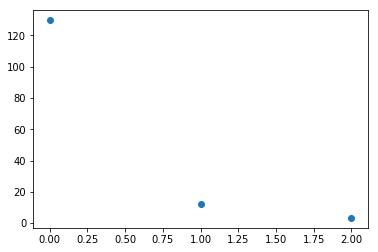

In [614]:
plt.scatter(range(3), A)
plt.show()

In [615]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2])
print(ts1)
np.allclose(ts, ts1)

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


True

In [616]:
ssa0 = SSA_group(A, U, V, len(ts), [0])
ssa1 = SSA_group(A, U, V, len(ts), [1])
ssa2 = SSA_group(A, U, V, len(ts), [2])
ssa01 = SSA_group(A, U, V, len(ts), [0, 1])
ssa02 = SSA_group(A, U, V, len(ts), [0, 2])
ssa12 = SSA_group(A, U, V, len(ts), [1, 2])

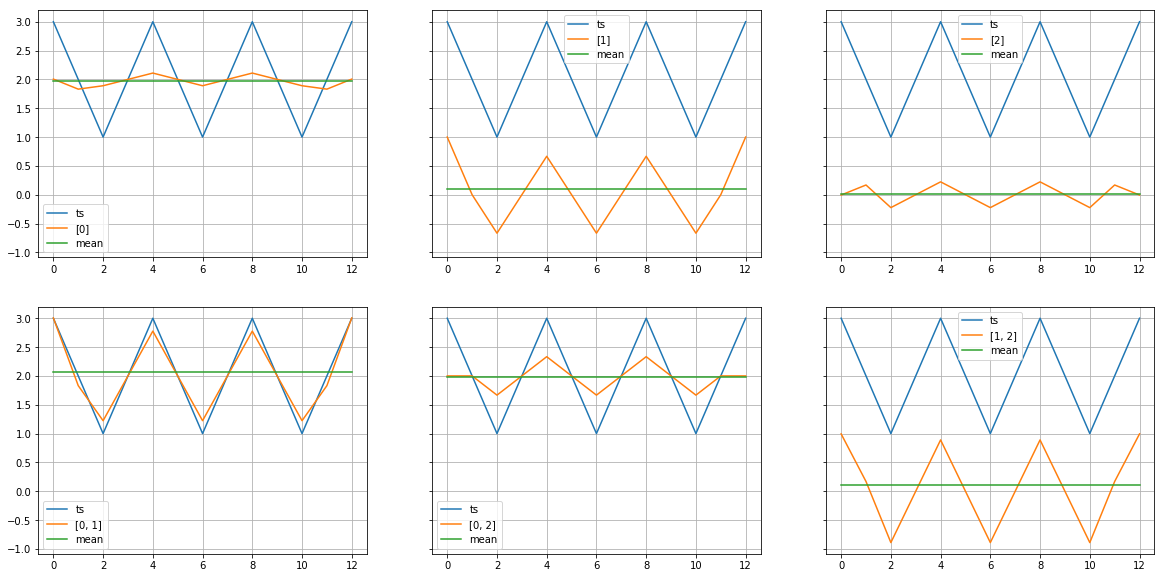

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
ax[0,0].plot(ts)
ax[0,0].plot(ssa0)
ax[0,0].plot([np.mean(ssa0)]*13)

ax[0,1].plot(ts)
ax[0,1].plot(ssa1)
ax[0,1].plot([np.mean(ssa1)]*13)

ax[0,2].plot(ts)
ax[0,2].plot(ssa2)
ax[0,2].plot([np.mean(ssa2)]*13)

ax[1,0].plot(ts)
ax[1,0].plot(ssa01)
ax[1,0].plot([np.mean(ssa01)]*13)

ax[1,1].plot(ts)
ax[1,1].plot(ssa02)
ax[1,1].plot([np.mean(ssa02)]*13)

ax[1,2].plot(ts)
ax[1,2].plot(ssa12)
ax[1,2].plot([np.mean(ssa12)]*13)

ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()
ax[0, 0].legend(["ts", "[0]", "mean"])
ax[0, 1].legend(["ts", "[1]", "mean"])
ax[0, 2].legend(["ts", "[2]", "mean"])
ax[1, 0].legend(["ts", "[0, 1]", "mean"])
ax[1, 1].legend(["ts", "[0, 2]", "mean"])
ax[1, 2].legend(["ts", "[1, 2]", "mean"])
plt.show()

- 0-компонента содержит некоторое среднее плавающее значение ряда (тренд) 
    - np.mean(ssa0) = 1.97
- 1-компонента и 2-компонента имеют среднее значение близкое к нулю
    - np.mean(ssa1) = 0.1
    - np.mean(ssa2) = 0.01
- 1-компонента и 2-компонента имеют одинаковый период, так как любая периодическая составляющая методом SSA всегда разлагается на парные компоненты. 
- амплитуда 1-компоненты выше амплитуды 2-компоненты, так как массив собственных чисел упорядочен по убыванию, то есть с ростом номера компоненты ее «вклад» в исходный ряд уменьшается.

Важно отметить, что с ростом длины окна $L$ разложения, все составляющие ряда будут «расплываться» по нескольким компонентам. То есть тренд не всегда есть 0-компонента, а скорее комбинация компонент с номерами близкими к нулю, а периодика не равна одной паре компонент, а есть комбинация нескольких пар с близкими номерами. Тем не менее, общий характер особенностей сохраняется.

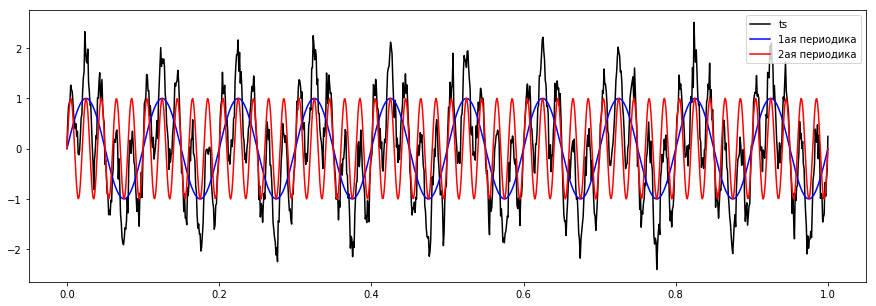

In [617]:
t = np.linspace(0, 1, 1024)
f1 = 10 #P = 1/10
f2 = 50 #P = 1/50
F = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 0.2*rand.randn(len(t))
plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b', label = '1ая периодика')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r', label = '2ая периодика')
#plt.axvline(x=0)
#plt.axvline(x=0.05)
plt.legend()
plt.show()

In [83]:
N = 1024
L = 20
K = N-L+1
w_min_diff = 1/min(L,K)
print(w_min_diff)

0.05


#### Выбор ширины окна L

In [46]:
arr = []
trend = np.sin(2*np.pi*f1*t)
for i in range(2, 50):
    A, U, V = SSA_modes(F, i)
    ssaF = SSA_group(A, U, V, len(F), [0])
    arr.append(sum(abs(trend - ssaF)))
    #print(i, sum(abs(trend - ssaF)))

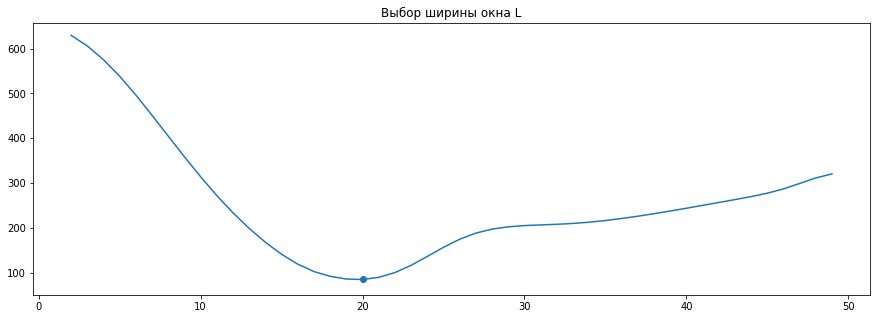

In [58]:
plt.figure(figsize = (15, 5))
plt.title("Выбор ширины окна L")
plt.plot(range(2, 50), arr)
plt.scatter(20, arr[18]) # np.argmin(arr) + 2
plt.show()

In [618]:
A, U, V = SSA_modes(F, 20)

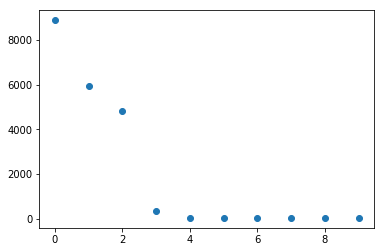

In [619]:
plt.scatter(range(10),A[:10])
plt.show()

In [620]:
A, U, V = SSA_modes(F, 20)
ssaF0 = SSA_group(A, U, V, len(F), [0])
ssaF1 = SSA_group(A, U, V, len(F), [1])
ssaF2 = SSA_group(A, U, V, len(F), [2])
ssaF01 = SSA_group(A, U, V, len(F), [0, 1])
ssaF02 = SSA_group(A, U, V, len(F), [0, 2])
ssaF12 = SSA_group(A, U, V, len(F), [1, 2])

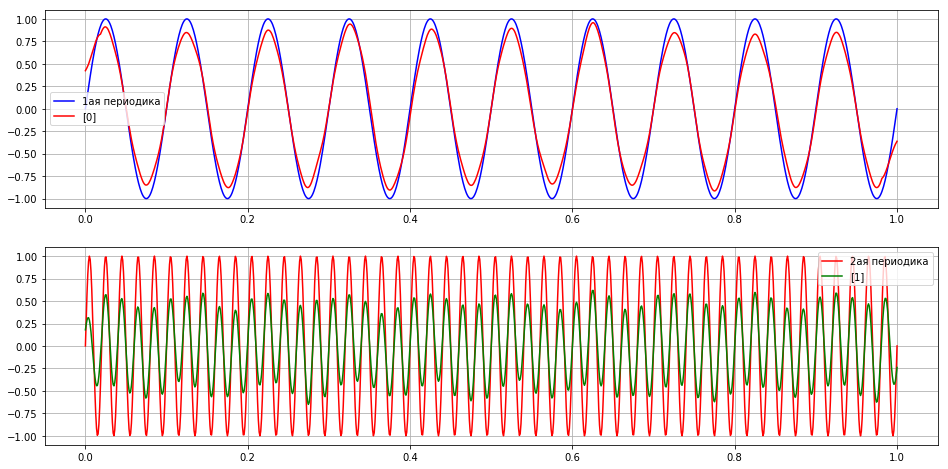

In [622]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
ax[0].plot(t, np.sin(2*np.pi*f1*t), 'b')
ax[0].plot(t, ssaF0, 'r')

ax[1].plot(t, np.sin(2*np.pi*f2*t), 'r')
ax[1].plot(t, ssaF1, 'g')

ax[0].grid()
ax[1].grid()
ax[0].legend(["1ая периодика", "[0]"])
ax[1].legend(["2ая периодика", "[1]"])
plt.show()

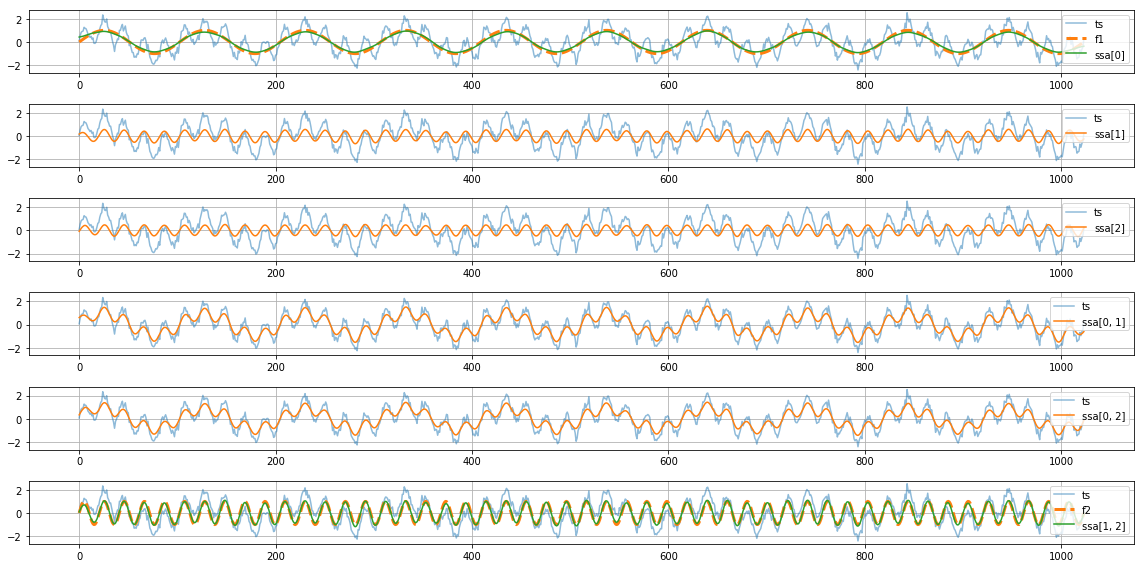

In [629]:
fig, ax = plt.subplots(6, 1, figsize=(16, 8), sharey = True)
ax[0].plot(F, label = 'ts', alpha=0.5)
ax[0].plot(range(1024), np.sin(2*np.pi*f1*t), ls = '--', lw = 3, label = 'f1')
ax[0].plot(ssaF0, label = 'ssa[0]')

ax[1].plot(F, label = 'ts', alpha=0.5)
ax[1].plot(ssaF1, label = 'ssa[1]')

ax[2].plot(F, label = 'ts', alpha=0.5)
ax[2].plot(ssaF2, label = 'ssa[2]')

ax[3].plot(F, label = 'ts', alpha=0.5)
ax[3].plot(ssaF01, label = 'ssa[0, 1]')

ax[4].plot(F, label = 'ts', alpha=0.5)
ax[4].plot(ssaF02, label = 'ssa[0, 2]')

ax[5].plot(F, label = 'ts', alpha=0.5)
ax[5].plot(range(1024), np.sin(2*np.pi*f2*t), ls = '--', lw = 3, label = 'f2')
ax[5].plot(ssaF12, label = 'ssa[1, 2]')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[0].legend()

ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
plt.tight_layout()
plt.show()

### Построение тренда для сильно зашумленного ВР

In [630]:
t = np.linspace(0, 4, 4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))

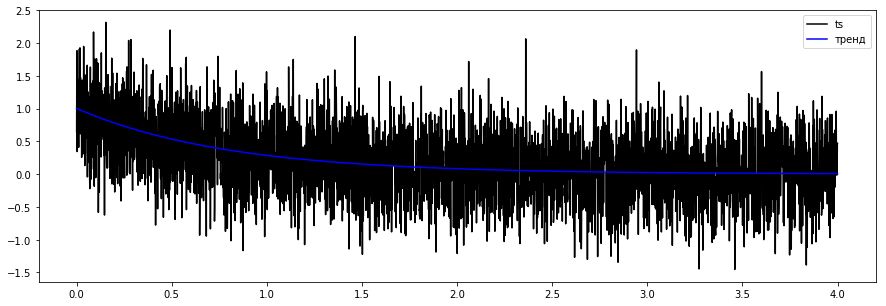

In [631]:
plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, np.exp(-0.4*np.pi*t), 'b', label = 'тренд')

plt.legend()
plt.show()

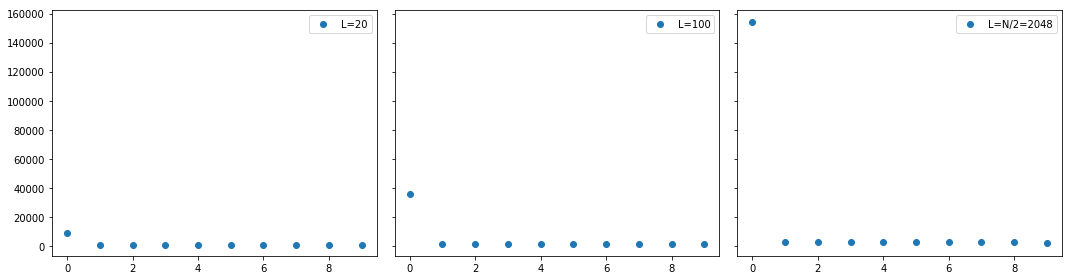

In [632]:
A0, U, V = SSA_modes(F, 20)
A1, U, V = SSA_modes(F, 100)
A2, U, V = SSA_modes(F, 2048)
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey = True)
ax[0].scatter(range(10), A0[:10], label = 'L=20')
ax[1].scatter(range(10), A1[:10], label = 'L=100')
ax[2].scatter(range(10), A2[:10], label = 'L=N/2=2048')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.tight_layout()

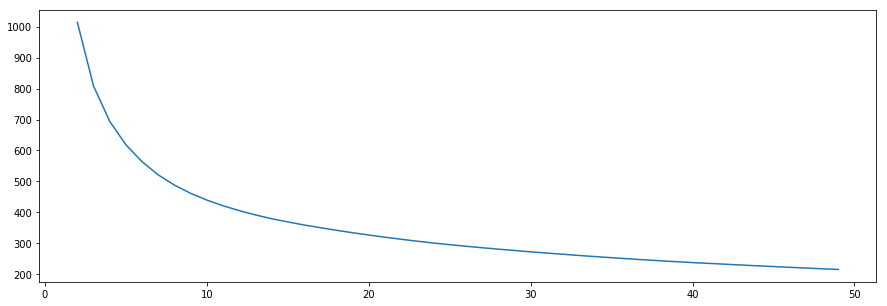

In [105]:
arr = []
trend = np.exp(-0.4*np.pi*t)
for i in range(2, 50):
    A, U, V = SSA_modes(F, i)
    ssaF = SSA_group(A, U, V, len(F), [0])
    arr.append(sum(abs(trend - ssaF)))
    #print(i, sum(abs(trend - ssaF)))
plt.figure(figsize = (15, 5))
plt.plot(range(2, 50), arr)
plt.show()

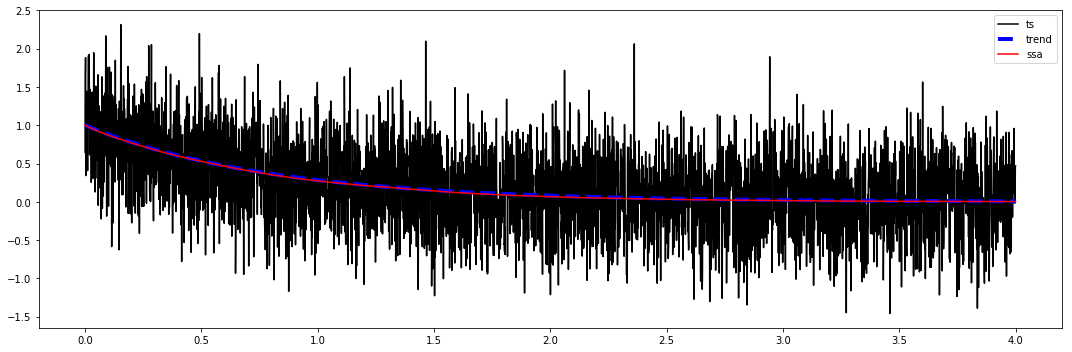

In [635]:
A, U, V = SSA_modes(F, 2048)
ssaF = SSA_group(A, U, V, len(F), [0])
trend = np.exp(-0.4*np.pi*t)
plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, np.exp(-0.4*np.pi*t), 'b', lw=4, ls='--', label = 'trend')
plt.plot(t, ssaF, 'r', label = 'ssa')
plt.tight_layout()
plt.legend()
plt.show()

### 4 гармоники с шумом

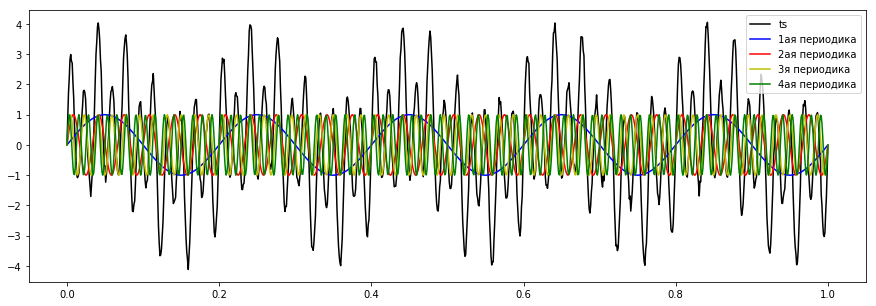

In [636]:
t = np.linspace(0, 1, 1024)
f1 = 5 
f2 = 30
f3 = 55
f4 = 80
F = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) \
+ np.sin(2*np.pi*f3*t) + np.sin(2*np.pi*f3*t) + 0.1*rand.randn(len(t))

p1 = np.sin(2*np.pi*f1*t)
p2 = np.sin(2*np.pi*f2*t)
p3 = np.sin(2*np.pi*f3*t)
p4 = np.sin(2*np.pi*f4*t)


plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b', label = '1ая периодика')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r', label = '2ая периодика')
plt.plot(t, np.sin(2*np.pi*f3*t), 'y', label = '3я периодика')
plt.plot(t, np.sin(2*np.pi*f4*t), 'g', label = '4ая периодика')
plt.legend()
plt.show()

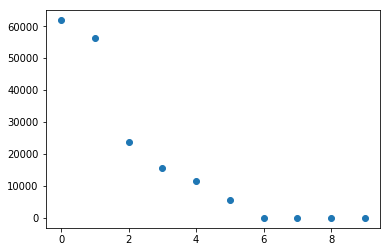

In [647]:
A, U, V = SSA_modes(F, 60)
plt.scatter(range(10),A[:10])
plt.show()

In [648]:
ssaF0 = SSA_group(A, U, V, len(F), [0])
ssaF1 = SSA_group(A, U, V, len(F), [1])
ssaF2 = SSA_group(A, U, V, len(F), [2])
ssaF3 = SSA_group(A, U, V, len(F), [3])
ssaF4 = SSA_group(A, U, V, len(F), [4])
ssaF5 = SSA_group(A, U, V, len(F), [5])
ssaF6 = SSA_group(A, U, V, len(F), [6])

ssaF34 = SSA_group(A, U, V, len(F), [3, 4])
ssaF23 = SSA_group(A, U, V, len(F), [2, 3])
ssaF45 = SSA_group(A, U, V, len(F), [4, 5])
ssaF15 = SSA_group(A, U, V, len(F), [1, 5])
ssaF25 = SSA_group(A, U, V, len(F), [2, 5])
ssaF01 = SSA_group(A, U, V, len(F), [0, 1])
#ssaF02 = SSA_group(A, U, V, len(F), [0, 2])
#ssaF12 = SSA_group(A, U, V, len(F), [1, 2])

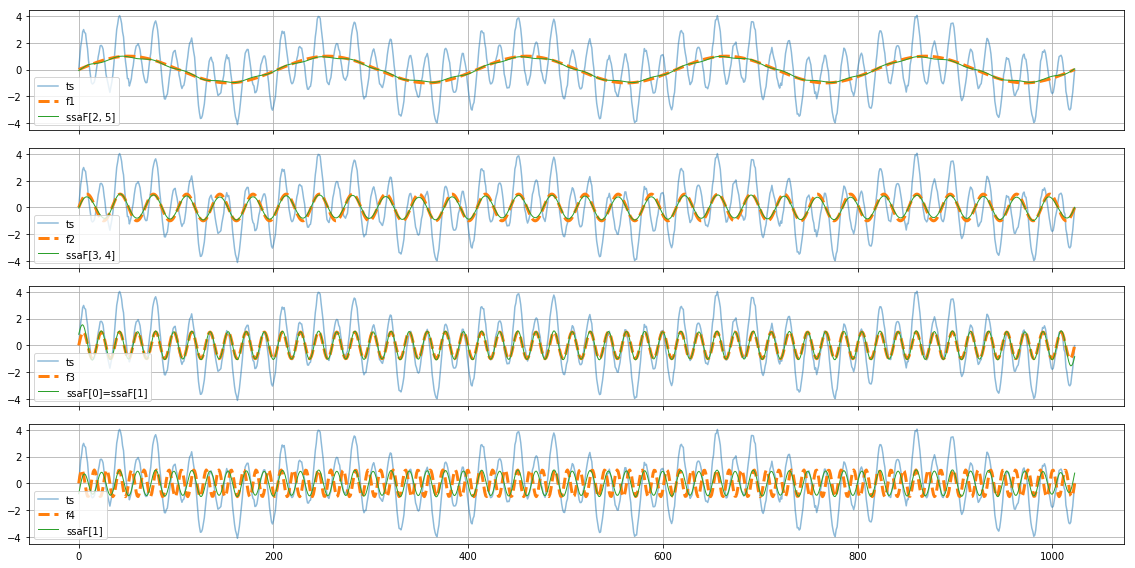

In [649]:
t = np.linspace(0, 1, 1024)
fig, ax = plt.subplots(4, 1, figsize=(16, 8), sharex = True, sharey=True)
ax[0].plot(F, alpha=0.5, label = 'ts')
ax[0].plot(p1, ls = '--', lw = 3, label = 'f1')
ax[0].plot(ssaF25, lw=1, label = 'ssaF[2, 5]')

ax[1].plot(F, alpha=0.5, label = 'ts')
ax[1].plot(p2, ls = '--', lw = 3, label = 'f2')
ax[1].plot(ssaF34,  lw=1, label = 'ssaF[3, 4]')

ax[2].plot(F, alpha=0.5, label = 'ts')
ax[2].plot(p3, ls = '--', lw = 3, label = 'f3')
ax[2].plot(ssaF0, lw=1, label = 'ssaF[0]=ssaF[1]') #дублируется с 1
#ax[1].plot(F, alpha=0.5, label = 'ts')

ax[3].plot(F, alpha=0.5, label = 'ts')
ax[3].plot(p4, ls = '--', lw = 3, label = 'f4')
ax[3].plot(ssaF1, lw=1, label = 'ssaF[1]')
#ax[2].plot(F, alpha=0.5, label = 'ts')




#ax[1,1].plot([np.mean(ssaF01)]*1000)



ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

#ax[0, 0].legend(["F", "[2]", "p1"])
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.tight_layout()
plt.show()

### Периодический сигнал с изломом частоты

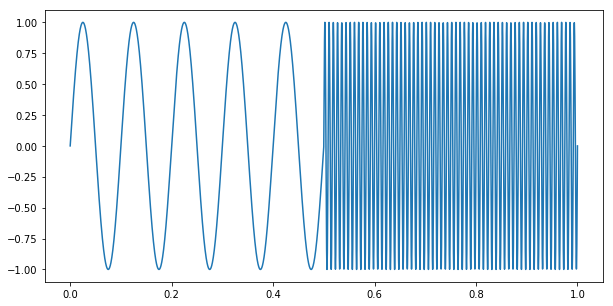

In [650]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

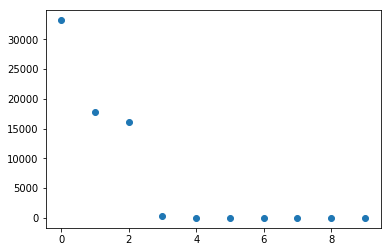

In [651]:
A, U, V = SSA_modes(x2, 33)
plt.scatter(range(10), A[:10])
plt.show()

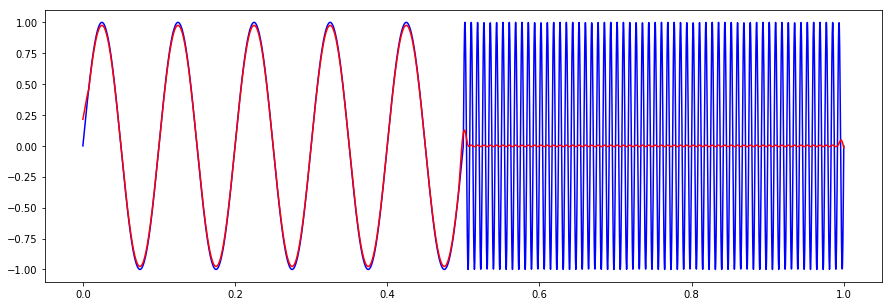

In [652]:
A, U, V = SSA_modes(x2, 33)
ssaF = SSA_group(A, U, V, len(x2), [0])
plt.figure(figsize = (15, 5))
plt.plot(t, x2, 'b')
plt.plot(t, ssaF, 'r')
plt.show()

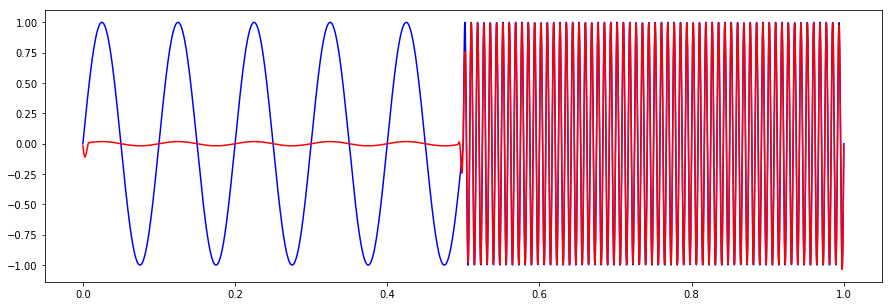

In [653]:
A, U, V = SSA_modes(x2, 33)
ssaF = SSA_group(A, U, V, len(x2), [1,2])
plt.figure(figsize = (15, 5))
plt.plot(t, x2, 'b')
plt.plot(t, ssaF, 'r')
plt.show()

### EEG

In [656]:
file = h5py.File('lab5.mat','r')
data = file.get('EEG')
eeg = np.array(data).T

In [657]:
N = eeg.shape[0]
L = eeg.shape[0]//2
K = N-L+1

w_min_diff = 1/min(L,K)
print(w_min_diff)

0.0005747126436781609


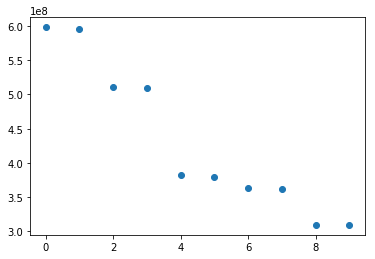

In [690]:
A, U, V = SSA_modes(eeg, L)
#max 1740
plt.scatter(range(10), A[:10])
plt.show()

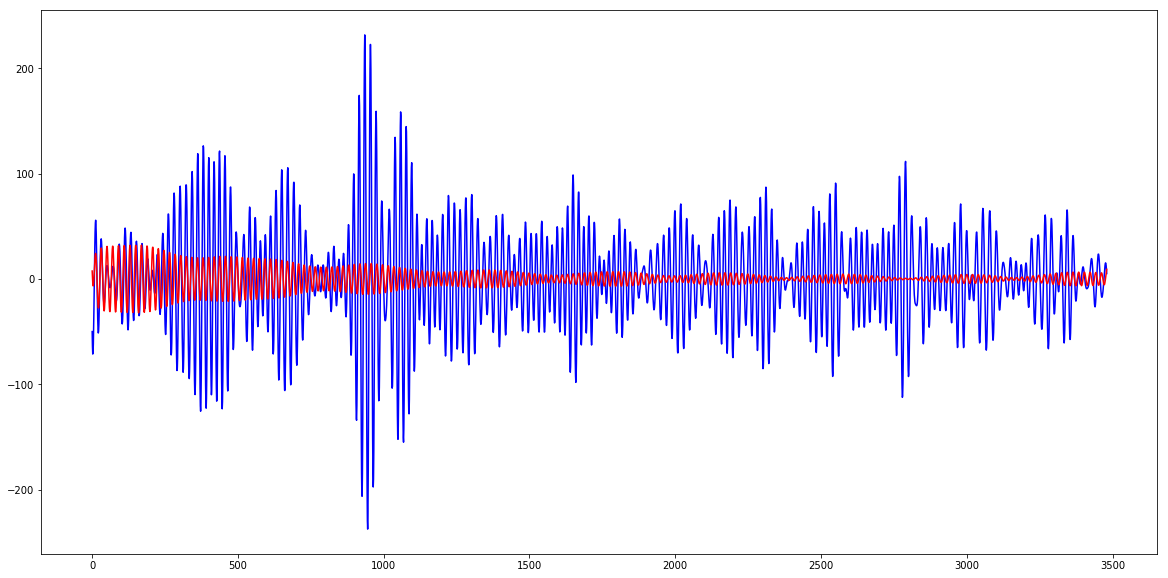

In [696]:
ssaF = SSA_group(A, U, V, len(eeg), [5])
plt.figure(figsize = (20, 10))
plt.plot(eeg, 'b')
plt.plot(ssaF, 'r')
plt.show()

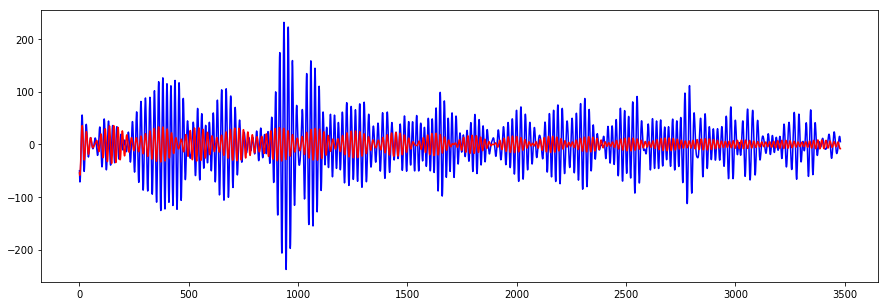

In [77]:
ssaF = SSA_group(A, U, V, len(eeg), [0,6])
plt.figure(figsize = (15, 5))
plt.plot(eeg, 'b')
plt.plot(ssaF, 'r')
plt.show()